In [1]:
import os
import time
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, StringType

## **Initializing a SparkSession**

**A `SparkSession` is a class from the PySpark module. It is the entrypoint to working with Apache Spark. This will allow us to create a PySpark DataFrame where we will read in data from our CSV files.**

<sup>Source: [pyspark.sql.SparkSession](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.SparkSession.html) from Spark.Apache.org<sup/>

In [2]:
spark = SparkSession.builder \
        .appName("test") \
        .getOrCreate()

24/03/31 18:33:23 WARN Utils: Your hostname, adrian resolves to a loopback address: 127.0.1.1; using 192.168.137.141 instead (on interface ens33)
24/03/31 18:33:23 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/03/31 18:33:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
#list all the csv files in the current directory as well as the size of the files in megabytes
for file in os.listdir():
    if '.csv' in file:
        print(f'The size of the {file} file is {os.stat(file).st_size/(1024 * 1024):,.2f} MB')

The size of the job_summary.csv file is 4,865.66 MB
The size of the job_skills.csv file is 641.55 MB


In [4]:
#list all the csv files in the read_test directory as well as the size of the files in megabytes
for file in os.listdir('read_test'):
    if '.csv' in file:
        print(f'The size of the {file} file is {os.stat("read_test/"+file).st_size/(1024 * 1024):,.2f} MB')

The size of the 16500000.csv file is 670.86 MB
The size of the 3000000.csv file is 112.00 MB
The size of the 22500000.csv file is 934.07 MB
The size of the 21000000.csv file is 868.27 MB
The size of the 6000000.csv file is 229.31 MB
The size of the 24000000.csv file is 999.87 MB
The size of the 12000000.csv file is 473.45 MB
The size of the 19500000.csv file is 802.46 MB
The size of the 18000000.csv file is 736.66 MB
The size of the 9000000.csv file is 346.61 MB
The size of the 4500000.csv file is 170.65 MB
The size of the 7500000.csv file is 287.96 MB
The size of the 13500000.csv file is 539.25 MB
The size of the 10500000.csv file is 407.64 MB
The size of the 1500000.csv file is 53.35 MB
The size of the 15000000.csv file is 605.05 MB


## **Reading a CSV File into a PySpark DataFrame**

In [5]:
#read in the csv file into a PySpark DataFrame
spark_df = spark.read.csv('job_skills.csv', header=True, inferSchema=True)

In [6]:
#display columns and first 5 rows
spark_df.show(5)

+--------------------+--------------------+
|            job_link|          job_skills|
+--------------------+--------------------+
|https://www.linke...|Building Custodia...|
|https://www.linke...|Customer service,...|
|https://www.linke...|Applied Behavior ...|
|https://www.linke...|Electrical Engine...|
|https://www.linke...|Electrical Assemb...|
+--------------------+--------------------+
only showing top 5 rows



In [7]:
print(f'There are {len(spark_df.columns)} columns and {spark_df.count():,} rows in the PySpark DataFrame')

There are 2 columns and 1,296,381 rows in the PySpark DataFrame


In [8]:
#output the data types for the columns with the built-in printSchema function
spark_df.printSchema()

root
 |-- job_link: string (nullable = true)
 |-- job_skills: string (nullable = true)



## **Using a Schema for a PySpark DataFrame**

**Within Apache Spark a `schema` provides the data format for a DataFrame or a Dataset.**

**For our `schema`, we will first set our `StructType` which is a set of `StructField`s. A `StructField` contains information for a given column including the column name (`name`), the type of data within the rows (`dataType`) and whether or not the row can contain a null value (`nullable`)**

In [9]:
schema = StructType([
    StructField('Column 1', IntegerType(), True),
    StructField('Column 2', IntegerType(), True),
    StructField('Column 3', IntegerType(), True),
    StructField('Column 4', IntegerType(), True),
    StructField('Column 5', IntegerType(), True)])

In [10]:
spark_df2 = spark.read.csv('read_test/3000000.csv', schema=schema, header=True)

In [11]:
spark_df2.show(5)

+--------+--------+--------+--------+--------+
|Column 1|Column 2|Column 3|Column 4|Column 5|
+--------+--------+--------+--------+--------+
|       0|       0|       0|       0|       0|
|       1|       1|       1|       1|       1|
|       2|       2|       2|       2|       2|
|       3|       3|       3|       3|       3|
|       4|       4|       4|       4|       4|
+--------+--------+--------+--------+--------+
only showing top 5 rows



In [12]:
print(f'There are {len(spark_df2.columns)} columns and {spark_df2.count():,} rows in the PySpark DataFrame')

There are 5 columns and 3,000,000 rows in the PySpark DataFrame


## **Reading Multiple CSV Files into a Single PySpark DataFrame**

In [13]:
#list of all the csv files in the "read_test" directory
csv_files = ['read_test/' + num +'.csv' for num in sorted([file.replace('.csv','') for file in os.listdir('read_test') if '.csv' in file],key=int)]

In [14]:
#list of the size of the csv files in megabytes
csv_file_size = [os.path.getsize(csv)/(1024 * 1024) for csv in csv_files]

In [15]:
print(f'The total size of all the CSV files in the read_test directory is {sum(csv_file_size):,.2f} MB')

The total size of all the CSV files in the read_test directory is 8,237.47 MB


In [16]:
spark_df3 = spark.read.csv(csv_files, schema=schema, header=True)

In [17]:
spark_df3.show(5)

+--------+--------+--------+--------+--------+
|Column 1|Column 2|Column 3|Column 4|Column 5|
+--------+--------+--------+--------+--------+
|       0|       0|       0|       0|       0|
|       1|       1|       1|       1|       1|
|       2|       2|       2|       2|       2|
|       3|       3|       3|       3|       3|
|       4|       4|       4|       4|       4|
+--------+--------+--------+--------+--------+
only showing top 5 rows



In [18]:
print(f'There are {len(spark_df3.columns)} columns and {spark_df3.count():,} rows in the PySpark DataFrame')

There are 5 columns and 204,000,000 rows in the PySpark DataFrame


## **Comparing PySpark and pandas Read Times**

In [19]:
%%timeit
df = spark.read.csv('job_skills.csv', header=True, inferSchema=True)

720 ms ± 36.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
%%timeit
df = pd.read_csv('job_skills.csv')

4.99 s ± 27.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
%%timeit
df = spark.read.csv('job_summary.csv', header=True, inferSchema=True)

8.61 s ± 288 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
#%%timeit
#df = pd.read_csv('job_summary.csv')

### **Graphing PySpark and pandas Read Times**

In [23]:
pandas_read_list = []

for csv in csv_files:
    avg_list = []
    for iteration in range(5):
        start = time.time()
        df = pd.read_csv(csv)
        stop = time.time()
        avg_list.append(stop-start)

    avg_time = sum(avg_list)/len(avg_list)
    pandas_read_list.append(avg_time)

In [24]:
pyspark_read_list = []

for csv in csv_files:
    avg_list = []
    for iteration in range(5):
        start = time.time()
        df = spark.read.csv(csv, header=True, inferSchema=True)
        stop = time.time()
        avg_list.append(stop-start)

    avg_time = sum(avg_list)/len(avg_list)
    pyspark_read_list.append(avg_time)

In [25]:
pyspark_schema_read_list = []

for csv in csv_files:
    avg_list = []
    for iteration in range(5):
        start = time.time()
        df = spark.read.csv(csv, schema=schema, header=True)
        stop = time.time()
        avg_list.append(stop-start)

    avg_time = sum(avg_list)/len(avg_list)
    pyspark_schema_read_list.append(avg_time)

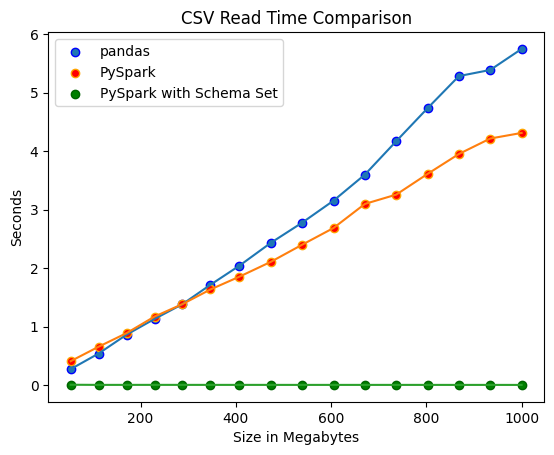

In [26]:
plt.scatter(csv_file_size,pandas_read_list,edgecolor='blue',label='pandas')
plt.plot(csv_file_size,pandas_read_list)

plt.scatter(csv_file_size,pyspark_read_list,color='red',edgecolor='orange',label='PySpark')
plt.plot(csv_file_size,pyspark_read_list)

plt.scatter(csv_file_size,pyspark_schema_read_list,color='green',edgecolor='darkgreen',label='PySpark with Schema Set')
plt.plot(csv_file_size,pyspark_schema_read_list)

plt.ylabel('Seconds')
plt.xlabel('Size in Megabytes')
plt.title('CSV Read Time Comparison')
plt.legend();

## **When Should I use PySpark?**

**As always there are a variety of factors that affect this decision. If you are working with medium to large size data sets (1 GB or above) then PySpark may be a more optimal choice relative to a data analysis tool such as pandas.**

**When reading in a CSV file for the first time, you can initially set the `InferSchema` parameter as `TRUE` to find the data types for each of the columns. After the data types are identified for the columns a `schema` should be created to significantly improve read times for the CSV file.**

# **References and Additional Learning**

## **Dataset**

- **[LinkedIn Dataset](https://www.kaggle.com/datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024/data) from Kaggle.com by asaniczka**

## **Documentation**

- **[pandas Documentation](https://pandas.pydata.org/) from pandas.pydata.org**

- **[PySpark Documentation](https://spark.apache.org/docs/latest/api/python/index.html) from Spark.Apache.org**

# **Connect**
- **Feel free to connect with Adrian on [YouTube](https://www.youtube.com/channel/UCPuDxI3xb_ryUUMfkm0jsRA), [LinkedIn](https://www.linkedin.com/in/adrian-dolinay-frm-96a289106/), [X](https://twitter.com/DolinayG), [GitHub](https://github.com/ad17171717), [Medium](https://adriandolinay.medium.com/) and [Odysee](https://odysee.com/@adriandolinay:0). Happy coding!**